<a href="https://colab.research.google.com/github/Fejcvk/data-mining/blob/polbert-experiment/src/notebookes/bert_poc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing

For now we need just pandas for parsing dataset and transformers for BERT

In [119]:
!conda update nbformat -y
!pip install transformers
import pandas as pd
from transformers import *
import numpy as np
import torch

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.12
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

fastai 1.0.60 requires nvidia-ml-py3, which is not installed.
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


Read excel file, skip headers and 1st row with column nasmes

PS : Small hack with deleting biggest files from dataset. Gonna be fixed after obtaining bigger resources

In [120]:
df= pd.read_excel('dataset.xlsx', header=None, skiprows=1)
# df.drop(df[df[4].map(len) > 250 ].index, inplace=True)
# df.reset_index()

For our smaller version of dataset just take two features that we are interested in, namely T PL and GOLD<T,H>

In [121]:
dataset = df[[4, 5]]

In [122]:
dataset.head

<bound method NDFrame.head of                                                       4  5
0     Ja na to, że mam klasówkę, że zawalę biologię ...  N
1            Ani że na progu stanął właśnie Romanyczko.  ?
2                  Potem, że się przywiezie Chińczyków.  N
3     Słabł coraz bardziej, czuł, że to kwestia zale...  N
4     Jednak ludzie bardzo ciężko chorzy, gdy już cz...  N
5     To znaczy, że szatan jest w desperacji, przeds...  N
6     Zresztą, w celi wcale nie czuło się, że jest maj.  E
7                      Czuję, że już mnie nie kochasz.   N
8                 A ja czuję, że nic z tego nie będzie.  N
9     Choć "Polskie Requiem" wykonywano już w bardzo...  N
10                  Czuję, że idą naprawdę dobre czasy.  N
11                    czułem że coś mi brakuje że jakoś  N
12    Ja patrzę na to tak: Niemcy czują, że ciągle m...  N
13    Odradzam czystość, jeśli czuję, że za tym kryj...  N
14    Po prostu czuję, że powinienem zgnić w krymina...  N
15    Spotkaliśmy też ludz

Change labels of ECN for numeric values

In [123]:
labels = {'E':0,'C':1,'N':2,'?':3}

for idx, row in dataset.iterrows():
    row[5] = labels[row[5]]

In [124]:
dataset

,4,5
0,"Ja na to, że mam klasówkę, że zawalę biologię ...",2
1,Ani że na progu stanął właśnie Romanyczko.,3
2,"Potem, że się przywiezie Chińczyków.",2
3,"Słabł coraz bardziej, czuł, że to kwestia zale...",2
4,"Jednak ludzie bardzo ciężko chorzy, gdy już cz...",2
5,"To znaczy, że szatan jest w desperacji, przeds...",2
6,"Zresztą, w celi wcale nie czuło się, że jest maj.",0
7,"Czuję, że już mnie nie kochasz.",2
8,"A ja czuję, że nic z tego nie będzie.",2
9,"Choć ""Polskie Requiem"" wykonywano już w bardzo...",2


In [125]:
dataset[5].value_counts()

2    1614
0     830
3      88
1      64
Name: 5, dtype: int64

In [126]:
max_len = 0
m_idx = 0
for idx,row in dataset.iterrows():
    l = len(row[4])
    if l > max_len:
        max_len = l
        m_idx = idx
print(m_idx)

360


In [127]:
print(dataset[4][m_idx])

Ci z koalicji rządzącej, ci posłowie, którzy w trakcie posiedzenia sejmowej Komisji Polityki Gospodarczej, Budżetu i Finansów z uporem, myślę, godnym lepszej sprawy, bronili faktu, aby rząd łącznie z budżetem - zapowiadam, łącznie z budżetem, bo mamy świadomość, że nie było i nie ma czasu na to, żeby wcześniej rozpatrywać założenia, a potem przedkładać budżet - przedłożył założenia polityki społeczno-gospodarczej, jako dokumentu ujmującego tę politykę w dłuższym czasie, posłowie, którzy nie dopuścili do takiego rozstrzygnięcia - przypominam, tylko jednym głosem - źle służą również rządowi.


In [128]:
!pip install sklearn
from sklearn.model_selection import train_test_split

fastai 1.0.60 requires nvidia-ml-py3, which is not installed.
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# Polbert

Here we import pretrained version of Bert for Polish language

In [149]:
model_class, tokenizer_class, pretrained_weights = (BertModel, BertTokenizer, "dkleczek/bert-base-polish-uncased-v1")

model = model_class.from_pretrained(pretrained_weights)
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)

## Tokenization

Tokenize every sentence from our dataset

In [150]:
tokenized = dataset[4].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

In [151]:
tokenized.values

array([list([2, 2055, 1898, 1907, 16, 2095, 2040, 15701, 1889, 3118, 16, 2095, 32091, 1014, 12071, 1014, 51, 1893, 15887, 1012, 1906, 27508, 2165, 4785, 18, 4]),
       list([2, 2937, 2095, 1898, 26468, 40126, 1019, 29480, 6977, 1013, 7150, 18, 4]),
       list([2, 3006, 16, 2095, 2243, 11319, 2713, 11007, 8572, 1889, 18, 4]),
       ...,
       list([2, 2030, 40221, 4949, 38584, 16, 2095, 2013, 2803, 12250, 1994, 26825, 2437, 48721, 16, 2030, 14229, 2114, 2808, 21694, 40575, 4955, 52867, 9417, 16, 2030, 8822, 1948, 2243, 24391, 3117, 4955, 52867, 1014, 27972, 16, 2030, 48570, 41886, 2243, 51, 5245, 50930, 36755, 50719, 15956, 23652, 2054, 18, 4]),
       list([2, 31040, 16, 2095, 29801, 6289, 1015, 16, 10865, 3403, 2243, 16, 2095, 2259, 16879, 1015, 1893, 40065, 1923, 2243, 68, 4109, 16, 2095, 2499, 3089, 1906, 3115, 3410, 18, 4]),
       list([2, 31040, 16, 2095, 29801, 6289, 1015, 16, 10865, 3403, 2243, 16, 2095, 2259, 16879, 1015, 1893, 40065, 1923, 2243, 68, 4109, 16, 2095, 2499, 

## Padding

We need to have input of the same lenght in order to feed BERT once (we will get performance speed). This will be some simple python string manipulations

In [152]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

In [153]:
max_len

146

Maybe we can consider shortening some sentences here

In [154]:
padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

In [155]:
padded

array([[    2,  2055,  1898, ...,     0,     0,     0],
       [    2,  2937,  2095, ...,     0,     0,     0],
       [    2,  3006,    16, ...,     0,     0,     0],
       ...,
       [    2,  2030, 40221, ...,     0,     0,     0],
       [    2, 31040,    16, ...,     0,     0,     0],
       [    2, 31040,    16, ...,     0,     0,     0]])

In [156]:
np.array(padded).shape

(2596, 146)

## Computing embedding using BERT

Now we do create cube of 146(tokens per row) * 768 (hidden layers) * 2596

In [157]:
input_ids = torch.tensor(np.array(padded))

In [158]:
input_ids

tensor([[    2,  2055,  1898,  ...,     0,     0,     0],
        [    2,  2937,  2095,  ...,     0,     0,     0],
        [    2,  3006,    16,  ...,     0,     0,     0],
        ...,
        [    2,  2030, 40221,  ...,     0,     0,     0],
        [    2, 31040,    16,  ...,     0,     0,     0],
        [    2, 31040,    16,  ...,     0,     0,     0]])

In [159]:
input_ids.shape

torch.Size([2596, 146])

In [160]:
with torch.no_grad():
    last_hidden_states = model(input_ids)

We will extract two sets of embeddings. One for CSL only (2D array) and one for the whole cube

In [162]:
features = last_hidden_states[0][:,:,:].numpy()

In [163]:
cls_features = last_hidden_states[0][:,0,:].numpy()

In [164]:
features.shape

(2596, 146, 768)

In [165]:
cls_features.shape

(2596, 768)

## Onehot encoding

In [166]:
y = np.array(dataset[5], dtype=np.int64)
y_labels = np.zeros((y.size, y.max()+1))
y_labels[np.arange(y.size),y] = 1
y_labels

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

## Feed Forward Neural Network
Creating Feed Forward Neural Network which will take as an input vector of embeddings and return one of semantic classes. Firstly we will do it for 2d CLS matrix

In [167]:
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as ds
import time

### Creating dataset

In [168]:
train_features, test_features, train_labels, test_labels = train_test_split(cls_features, y)

## Convert data to Torch tensor

In [169]:
train_features = torch.from_numpy(train_features)
test_features = torch.from_numpy(test_features)
train_labels = torch.from_numpy(train_labels)
test_labels = torch.from_numpy(test_labels)

In [299]:
batch_size = int(train_features.shape[0] / 10)
epochs = 20
batch_size

194

In [325]:
import torch.nn.functional as F

class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function 1: 784 --> 100
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity 1
        self.relu1 = nn.ReLU()

        # Linear function 2: 100 --> 100
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.relu2 = nn.ReLU()

        # Linear function 3: 100 --> 100
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 3
        self.relu3 = nn.ReLU()

        # Linear function 4 (readout): 100 --> 10
        self.fc4 = nn.Linear(hidden_dim, output_dim)  

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        return F.log_softmax(x)

In [326]:
input_dim = 768
hidden_dim = 256
output_dim = len(labels)

input_dim

768

In [327]:
ffnn = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

In [328]:
loss_fn = nn.CrossEntropyLoss()

In [329]:
for param in ffnn.parameters():
    print (param)

Parameter containing:
tensor([[ 0.0220, -0.0304, -0.0040,  ..., -0.0181, -0.0017,  0.0239],
        [-0.0040, -0.0117, -0.0244,  ...,  0.0138,  0.0004, -0.0221],
        [-0.0149,  0.0325, -0.0181,  ...,  0.0263,  0.0030, -0.0158],
        ...,
        [-0.0147,  0.0221, -0.0097,  ...,  0.0206, -0.0253,  0.0132],
        [-0.0307, -0.0319, -0.0294,  ...,  0.0269, -0.0335,  0.0347],
        [-0.0001,  0.0040,  0.0056,  ..., -0.0106, -0.0193,  0.0158]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0339,  0.0356,  0.0059,  0.0107, -0.0315,  0.0231, -0.0001,  0.0167,
        -0.0012,  0.0064,  0.0060,  0.0330,  0.0347, -0.0244, -0.0129, -0.0150,
        -0.0219,  0.0115,  0.0027, -0.0151,  0.0127, -0.0195,  0.0289,  0.0104,
         0.0243, -0.0012,  0.0039,  0.0348,  0.0129, -0.0349, -0.0204, -0.0266,
        -0.0204,  0.0157, -0.0337, -0.0004, -0.0214, -0.0126, -0.0310,  0.0299,
        -0.0254,  0.0044, -0.0132, -0.0006,  0.0109, -0.0230, -0.0191,  0.0314,
         0.0227

In [330]:
learning_rate = 0.05
optimizer = torch.optim.SGD(ffnn.parameters(), lr=learning_rate) 

In [331]:
def generate_batch_data(x, y, batch_size):
    i, batch = 0, 0
    for batch, i in enumerate(range(0, len(x) - batch_size, batch_size), 1):
        x_batch = x[i : i + batch_size]
        y_batch = y[i : i + batch_size]
        yield x_batch, y_batch, batch
    if i + batch_size < len(x):
        yield x[i + batch_size :], y[i + batch_size :], batch + 1
    if batch == 0:
        yield x, y, 1

In [332]:
train_losses, val_losses = [], []

for epoch in range(0,epochs):
    
    start_time = time.time()
    ffnn.train(True)
    train_loss = 0 
    
    for x_batch, y_batch, batch in generate_batch_data(train_features, train_labels, batch_size):
        y_pred = ffnn(x_batch)
        optimizer.zero_grad()
        loss = loss_fn(y_pred, y_batch)

        # Getting gradients w.r.t. parameters
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    train_loss /= batch
    train_losses.append(train_loss)
    elapsed = time.time() - start_time
    
    model.eval() # disable dropout for deterministic output
    # deactivate autograd engine to reduce memory usage and speed up computations
    with torch.no_grad(): 
            val_loss, batch = 0, 1
            for x_batch, y_batch, batch in generate_batch_data(test_features, test_labels, batch_size):
                y_pred = ffnn(x_batch)
                loss = loss_fn(y_pred, y_batch)
                val_loss += loss.item()
            val_loss /= batch
            val_losses.append(val_loss) 
            print("Epoch %d Train loss: %.2f. Validation loss: %.2f. Elapsed time: %.2fs." % (epoch + 1, train_losses[-1], val_losses[-1], elapsed))
    

AttributeError: 'FeedforwardNeuralNetModel' object has no attribute 'conv1'

Text(0.5, 1.0, 'Losses')

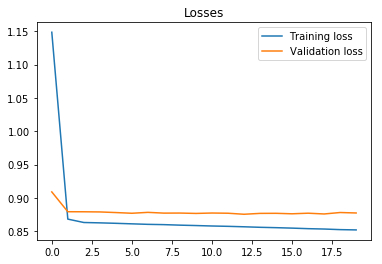

In [308]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.plot(train_losses, label="Training loss")
plt.plot(val_losses, label="Validation loss")
plt.legend()
plt.title("Losses")